# 第三章 PyTorch基础：Tensor和Autograd

## 3.1 Tensor

Tensor，又名张量，读者可能对这个名词似曾相识，因它不仅在PyTorch中出现过，它也是Theano、TensorFlow、
Torch和MxNet中重要的数据结构。关于张量的本质不乏深度的剖析，但从工程角度来讲，可简单地认为它就是一个数组，且支持高效的科学计算。它可以是一个数（标量）、一维数组（向量）、二维数组（矩阵）和更高维的数组（高阶数据）。Tensor和Numpy的ndarrays类似，但PyTorch的tensor支持GPU加速。

本节将系统讲解tensor的使用，力求面面俱到，但不会涉及每个函数。对于更多函数及其用法，读者可通过在IPython/Notebook中使用函数名加`?`查看帮助文档，或查阅PyTorch官方文档[^1]。

[^1]: http://docs.pytorch.org

In [1]:
# Let's begin
import torch  as t
t.__version__

'1.2.0'

###  3.1.1 基础操作

学习过Numpy的读者会对本节内容感到非常熟悉，因tensor的接口有意设计成与Numpy类似，以方便用户使用。但不熟悉Numpy也没关系，本节内容并不要求先掌握Numpy。

从接口的角度来讲，对tensor的操作可分为两类：

1. `torch.function`，如`torch.save`等。
2. 另一类是`tensor.function`，如`tensor.view`等。

为方便使用，对tensor的大部分操作同时支持这两类接口，在本书中不做具体区分，如`torch.sum (torch.sum(a, b))`与`tensor.sum (a.sum(b))`功能等价。

而从存储的角度来讲，对tensor的操作又可分为两类：

1. 不会修改自身的数据，如 `a.add(b)`， 加法的结果会返回一个新的tensor。
2. 会修改自身的数据，如 `a.add_(b)`， 加法的结果仍存储在a中，a被修改了。

函数名以`_`结尾的都是inplace方式, 即会修改调用者自己的数据，在实际应用中需加以区分。

#### 创建Tensor

在PyTorch中新建tensor的方法有很多，具体如表3-1所示。

表3-1: 常见新建tensor的方法

|函数|功能|
|:---:|:---:|
|Tensor(\*sizes)|基础构造函数|
|tensor(data,)|类似np.array的构造函数|
|ones(\*sizes)|全1Tensor|
|zeros(\*sizes)|全0Tensor|
|eye(\*sizes)|对角线为1，其他为0|
|arange(s,e,step|从s到e，步长为step|
|linspace(s,e,steps)|从s到e，均匀切分成steps份|
|rand/randn(\*sizes)|均匀/标准分布|
|normal(mean,std)/uniform(from,to)|正态分布/均匀分布|
|randperm(m)|随机排列|

这些创建方法都可以在创建的时候指定数据类型dtype和存放device(cpu/gpu).


其中使用`Tensor`函数新建tensor是最复杂多变的方式，它既可以接收一个list，并根据list的数据新建tensor，也能根据指定的形状新建tensor，还能传入其他的tensor，下面举几个例子。

In [2]:
# 指定tensor的形状
a = t.Tensor(2, 3)
a # 数值取决于内存空间的状态，print时候可能overflow

tensor([[2.0681e+20, 2.6685e-09, 4.2315e+21],
        [6.4464e-10, 2.0803e+23, 3.2691e+21]])

In [3]:
# 用list的数据创建tensor
b = t.Tensor([[1,2,3],[4,5,6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [4]:
b.tolist() # 把tensor转为list

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

`tensor.size()`返回`torch.Size`对象，它是tuple的子类，但其使用方式与tuple略有区别

In [5]:
b_size = b.size()
b_size

torch.Size([2, 3])

In [6]:
b.numel() # b中元素总个数，2*3，等价于b.nelement()

6

In [7]:
# 创建一个和b形状一样的tensor
c = t.Tensor(b_size)
# 创建一个元素为2和3的tensor
d = t.Tensor((2, 3))
c, d

(tensor([[4.4213e-38, 7.1326e-43, 4.4213e-38],
         [7.1326e-43, 2.2981e-38, 7.1326e-43]]),
 tensor([2., 3.]))

除了`tensor.size()`，还可以利用`tensor.shape`直接查看tensor的形状，`tensor.shape`等价于`tensor.size()`

In [8]:
c.shape

torch.Size([2, 3])

需要注意的是，`t.Tensor(*sizes)`创建tensor时，系统不会马上分配空间，只是会计算剩余的内存是否足够使用，使用到tensor时才会分配，而其它操作都是在创建完tensor之后马上进行空间分配。其它常用的创建tensor的方法举例如下。

In [9]:
t.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [10]:
t.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [14]:
t.arange(1, 6, 1)

tensor([1, 2, 3, 4, 5])

In [12]:
t.linspace(1, 10, 3)

tensor([ 1.0000,  5.5000, 10.0000])

In [15]:
t.randn(2, 3, device=t.device('cpu'))

tensor([[-0.5418, -0.9198, -1.0864],
        [-1.8070,  1.8021,  0.3956]])

In [16]:
t.randperm(5) # 长度为5的随机排列

tensor([0, 3, 4, 2, 1])

In [17]:
t.eye(2, 3, dtype=t.int) # 对角线为1, 不要求行列数一致

tensor([[1, 0, 0],
        [0, 1, 0]], dtype=torch.int32)

`torch.tensor`是在0.4版本新增加的一个新版本的创建tensor方法，使用的方法，和参数几乎和`np.array`完全一致

In [18]:
scalar = t.tensor(3.14159) 
print('scalar: %s, shape of sclar: %s' %(scalar, scalar.shape))

scalar: tensor(3.1416), shape of sclar: torch.Size([])


In [19]:
vector = t.tensor([1, 2])
print('vector: %s, shape of vector: %s' %(vector, vector.shape))

vector: tensor([1, 2]), shape of vector: torch.Size([2])


In [20]:
tensor = t.Tensor(1,2) # 注意和t.tensor([1, 2])的区别
tensor.shape

torch.Size([1, 2])

In [21]:
matrix = t.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])
matrix,matrix.shape

(tensor([[0.1000, 1.2000],
         [2.2000, 3.1000],
         [4.9000, 5.2000]]),
 torch.Size([3, 2]))

In [22]:
t.tensor([[0.11111, 0.222222, 0.3333333]],
                     dtype=t.float64,
                     device=t.device('cpu'))

tensor([[0.1111, 0.2222, 0.3333]], dtype=torch.float64)

In [23]:
empty_tensor = t.tensor([])
empty_tensor.shape

torch.Size([0])

#### 常用Tensor操作

通过`tensor.view`方法可以调整tensor的形状，但必须保证调整前后元素总数一致。`view`不会修改自身的数据，返回的新tensor与源tensor共享内存，也即更改其中的一个，另外一个也会跟着改变。在实际应用中可能经常需要添加或减少某一维度，这时候`squeeze`和`unsqueeze`两个函数就派上用场了。

In [24]:
a = t.arange(0, 6)
a.view(2, 3)

tensor([[0, 1, 2],
        [3, 4, 5]])

In [25]:
b = a.view(-1, 3) # 当某一维为-1的时候，会自动计算它的大小
b.shape

torch.Size([2, 3])

In [26]:
b.unsqueeze(1) # 注意形状，在第1维（下标从0开始）上增加“１” 
#等价于 b[:,None]
b[:, None].shape

torch.Size([2, 1, 3])

In [27]:
b.unsqueeze(-2) # -2表示倒数第二个维度

tensor([[[0, 1, 2]],

        [[3, 4, 5]]])

In [28]:
c = b.view(1, 1, 1, 2, 3)
c.squeeze(0) # 压缩第0维的“１”

tensor([[[[0, 1, 2],
          [3, 4, 5]]]])

In [29]:
c.shape

torch.Size([1, 1, 1, 2, 3])

In [30]:
c.squeeze() # 把所有维度为“1”的压缩

tensor([[0, 1, 2],
        [3, 4, 5]])

In [31]:
a[1] = 100
b # a修改，b作为view之后的，也会跟着修改

tensor([[  0, 100,   2],
        [  3,   4,   5]])

`resize`是另一种可用来调整`size`的方法，但与`view`不同，它可以修改tensor的大小。如果新大小超过了原大小，会自动分配新的内存空间，而如果新大小小于原大小，则之前的数据依旧会被保存，看一个例子。

In [32]:
b.resize_(1, 3)
b

tensor([[  0, 100,   2]])

In [33]:
b.resize_(3, 3) # 旧的数据依旧保存着，多出的大小会分配新空间
b

tensor([[              0,             100,               2],
        [              3,               4,               5],
        [111295487561710,    420906860300,  86011015090012]])

#### 索引操作

Tensor支持与numpy.ndarray类似的索引操作，语法上也类似，下面通过一些例子，讲解常用的索引操作。如无特殊说明，索引出来的结果与原tensor共享内存，也即修改一个，另一个会跟着修改。

In [34]:
a = t.randn(3, 4)
a

tensor([[-1.1427, -0.6247,  0.7083, -0.8276],
        [ 0.5155,  0.3117,  1.0403,  1.2435],
        [ 1.3579, -0.9750, -1.5401,  0.7008]])

In [35]:
a[0] # 第0行(下标从0开始)

tensor([-1.1427, -0.6247,  0.7083, -0.8276])

In [36]:
a[:, 0] # 第0列

tensor([-1.1427,  0.5155,  1.3579])

In [37]:
a[0][2] # 第0行第2个元素，等价于a[0, 2]

tensor(0.7083)

In [38]:
a[0, -1] # 第0行最后一个元素

tensor(-0.8276)

In [39]:
a[:2] # 前两行

tensor([[-1.1427, -0.6247,  0.7083, -0.8276],
        [ 0.5155,  0.3117,  1.0403,  1.2435]])

In [40]:
a[:2, 0:2] # 前两行，第0,1列

tensor([[-1.1427, -0.6247],
        [ 0.5155,  0.3117]])

In [41]:
print(a[0:1, :2]) # 第0行，前两列 
print(a[0, :2]) # 注意两者的区别：形状不同

tensor([[-1.1427, -0.6247]])
tensor([-1.1427, -0.6247])


In [42]:
# None类似于np.newaxis, 为a新增了一个轴
# 等价于a.view(1, a.shape[0], a.shape[1])
a[None].shape

torch.Size([1, 3, 4])

In [43]:
a[None].shape # 等价于a[None,:,:]

torch.Size([1, 3, 4])

In [44]:
a[:,None,:].shape

torch.Size([3, 1, 4])

In [45]:
a[:,None,:,None,None].shape

torch.Size([3, 1, 4, 1, 1])

In [46]:
a > 1 # 返回一个ByteTensor

tensor([[False, False, False, False],
        [False, False,  True,  True],
        [ True, False, False, False]])

In [47]:
a[a>1] # 等价于a.masked_select(a>1)
# 选择结果与原tensor不共享内存空间

tensor([1.0403, 1.2435, 1.3579])

In [48]:
a[t.LongTensor([0,1])] # 第0行和第1行

tensor([[-1.1427, -0.6247,  0.7083, -0.8276],
        [ 0.5155,  0.3117,  1.0403,  1.2435]])

其它常用的选择函数如表3-2所示。

表3-2常用的选择函数

函数|功能|
:---:|:---:|
index_select(input, dim, index)|在指定维度dim上选取，比如选取某些行、某些列
masked_select(input, mask)|例子如上，a[a>0]，使用ByteTensor进行选取
non_zero(input)|非0元素的下标
gather(input, dim, index)|根据index，在dim维度上选取数据，输出的size与index一样


`gather`是一个比较复杂的操作，对一个2维tensor，输出的每个元素如下：

```python
out[i][j] = input[index[i][j]][j]  # dim=0
out[i][j] = input[i][index[i][j]]  # dim=1
```
三维tensor的`gather`操作同理，下面举几个例子。

In [49]:
a = t.arange(0, 16).view(4, 4)
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [50]:
# 选取对角线的元素
index = t.LongTensor([[0,1,2,3]])
a.gather(0, index)

tensor([[ 0,  5, 10, 15]])

In [51]:
# 选取反对角线上的元素
index = t.LongTensor([[3,2,1,0]]).t()
a.gather(1, index)

tensor([[ 3],
        [ 6],
        [ 9],
        [12]])

In [52]:
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [53]:
# 选取反对角线上的元素，注意与上面的不同
index = t.LongTensor([[3,2,1,0]])
a.gather(0, index)

tensor([[12,  9,  6,  3]])

In [54]:
# 选取两个对角线上的元素
index = t.LongTensor([[0,1,2,3],[3,2,1,0]]).t()
b = a.gather(1, index)
b

tensor([[ 0,  3],
        [ 5,  6],
        [10,  9],
        [15, 12]])

与`gather`相对应的逆操作是`scatter_`，`gather`把数据从input中按index取出，而`scatter_`是把取出的数据再放回去。注意`scatter_`函数是inplace操作。

```python
out = input.gather(dim, index)
-->近似逆操作
out = Tensor()
out.scatter_(dim, index)
```

In [55]:
# 把两个对角线元素放回去到指定位置
c = t.zeros(4,4)
c.scatter_(1, index, b.float())

tensor([[ 0.,  0.,  0.,  3.],
        [ 0.,  5.,  6.,  0.],
        [ 0.,  9., 10.,  0.],
        [12.,  0.,  0., 15.]])

对tensor的任何索引操作仍是一个tensor，想要获取标准的python对象数值，需要调用`tensor.item()`, 这个方法只对包含一个元素的tensor适用

In [56]:
a[0,0] #依旧是tensor）

tensor(0)

In [57]:
a[0,0].item() # python float

0

In [58]:
d = a[0:1, 0:1, None]
print(d.shape)
d.item() # 只包含一个元素的tensor即可调用tensor.item,与形状无关

torch.Size([1, 1, 1])


0

In [59]:
a[0].item()
# raise ValueError: only one element tensors can be converted to Python scalars

ValueError: only one element tensors can be converted to Python scalars

#### 高级索引
PyTorch在0.2版本中完善了索引操作，目前已经支持绝大多数numpy的高级索引[^10]。高级索引可以看成是普通索引操作的扩展，但是高级索引操作的结果一般不和原始的Tensor共享内存。 
[^10]: https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#advanced-indexing

In [60]:
x = t.arange(0,27).view(3,3,3)
x

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [61]:
x[[1, 2], [1, 2], [2, 0]] # x[1,1,2]和x[2,2,0]

tensor([14, 24])

In [62]:
x[[2, 1, 0], [0], [1]] # x[2,0,1],x[1,0,1],x[0,0,1]

tensor([19, 10,  1])

In [63]:
x[[0, 2], ...] # x[0] 和 x[2]

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

#### Tensor类型

Tensor有不同的数据类型，如表3-3所示，每种类型分别对应有CPU和GPU版本(HalfTensor除外)。默认的tensor是FloatTensor，可通过`t.set_default_tensor_type` 来修改默认tensor类型(如果默认类型为GPU tensor，则所有操作都将在GPU上进行)。Tensor的类型对分析内存占用很有帮助。例如对于一个size为(1000, 1000, 1000)的FloatTensor，它有`1000*1000*1000=10^9`个元素，每个元素占32bit/8 = 4Byte内存，所以共占大约4GB内存/显存。HalfTensor是专门为GPU版本设计的，同样的元素个数，显存占用只有FloatTensor的一半，所以可以极大缓解GPU显存不足的问题，但由于HalfTensor所能表示的数值大小和精度有限[^2]，所以可能出现溢出等问题。

[^2]: https://stackoverflow.com/questions/872544/what-range-of-numbers-can-be-represented-in-a-16-32-and-64-bit-ieee-754-syste

表3-3: tensor数据类型

| Data type                | dtype                             | CPU tensor                                                   | GPU tensor                |
| ------------------------ | --------------------------------- | ------------------------------------------------------------ | ------------------------- |
| 32-bit floating point    | `torch.float32` or `torch.float`  | `torch.FloatTensor`                                          | `torch.cuda.FloatTensor`  |
| 64-bit floating point    | `torch.float64` or `torch.double` | `torch.DoubleTensor`                                         | `torch.cuda.DoubleTensor` |
| 16-bit floating point    | `torch.float16` or `torch.half`   | `torch.HalfTensor`                                           | `torch.cuda.HalfTensor`   |
| 8-bit integer (unsigned) | `torch.uint8`                     | [`torch.ByteTensor`](https://pytorch.org/docs/stable/tensors.html#torch.ByteTensor) | `torch.cuda.ByteTensor`   |
| 8-bit integer (signed)   | `torch.int8`                      | `torch.CharTensor`                                           | `torch.cuda.CharTensor`   |
| 16-bit integer (signed)  | `torch.int16` or `torch.short`    | `torch.ShortTensor`                                          | `torch.cuda.ShortTensor`  |
| 32-bit integer (signed)  | `torch.int32` or `torch.int`      | `torch.IntTensor`                                            | `torch.cuda.IntTensor`    |
| 64-bit integer (signed)  | `torch.int64` or `torch.long`     | `torch.LongTensor`                                           | `torch.cuda.LongTensor`   |

 

各数据类型之间可以互相转换，`type(new_type)`是通用的做法，同时还有`float`、`long`、`half`等快捷方法。CPU tensor与GPU tensor之间的互相转换通过`tensor.cuda`和`tensor.cpu`方法实现，此外还可以使用`tensor.to(device)`。Tensor还有一个`new`方法，用法与`t.Tensor`一样，会调用该tensor对应类型的构造函数，生成与当前tensor类型一致的tensor。`torch.*_like(tensora)` 可以生成和`tensora`拥有同样属性(类型，形状，cpu/gpu)的新tensor。 `tensor.new_*(new_shape)` 新建一个不同形状的tensor。

In [64]:
# 设置默认tensor，注意参数是字符串
t.set_default_tensor_type('torch.DoubleTensor')

In [65]:
a = t.Tensor(2,3)
a.dtype # 现在a是DoubleTensor,dtype是float64

torch.float64

In [66]:
# 恢复之前的默认设置
t.set_default_tensor_type('torch.FloatTensor')

In [67]:
# 把a转成FloatTensor，等价于b=a.type(t.FloatTensor)
b = a.float() 
b.dtype

torch.float32

In [68]:
c = a.type_as(b)
c

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [69]:
a.new(2,3) # 等价于torch.DoubleTensor(2,3)，建议使用a.new_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [70]:
t.zeros_like(a) #等价于t.zeros(a.shape,dtype=a.dtype,device=a.device)

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [71]:
t.zeros_like(a, dtype=t.int16) #可以修改某些属性

tensor([[0, 0, 0],
        [0, 0, 0]], dtype=torch.int16)

In [72]:
t.rand_like(a)

tensor([[0.2752, 0.2905, 0.4608],
        [0.5302, 0.7321, 0.0557]], dtype=torch.float64)

In [73]:
a.new_ones(4,5, dtype=t.int)

tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=torch.int32)

In [74]:
a.new_tensor([3,4]) # 

tensor([3., 4.], dtype=torch.float64)

#### 逐元素操作

这部分操作会对tensor的每一个元素(point-wise，又名element-wise)进行操作，此类操作的输入与输出形状一致。常用的操作如表3-4所示。

表3-4: 常见的逐元素操作

|函数|功能|
|:--:|:--:|
|abs/sqrt/div/exp/fmod/log/pow..|绝对值/平方根/除法/指数/求余/求幂..|
|cos/sin/asin/atan2/cosh..|相关三角函数|
|ceil/round/floor/trunc| 上取整/四舍五入/下取整/只保留整数部分|
|clamp(input, min, max)|超过min和max部分截断|
|sigmod/tanh..|激活函数

对于很多操作，例如div、mul、pow、fmod等，PyTorch都实现了运算符重载，所以可以直接使用运算符。如`a ** 2` 等价于`torch.pow(a,2)`, `a * 2`等价于`torch.mul(a,2)`。

其中`clamp(x, min, max)`的输出满足以下公式：
$$
y_i =
\begin{cases}
min,  & \text{if  } x_i \lt min \\
x_i,  & \text{if  } min \le x_i \le max  \\
max,  & \text{if  } x_i \gt max\\
\end{cases}
$$
`clamp`常用在某些需要比较大小的地方，如取一个tensor的每个元素与另一个数的较大值。

In [75]:
a = t.arange(0, 6).view(2, 3).float()
t.cos(a)

tensor([[ 1.0000,  0.5403, -0.4161],
        [-0.9900, -0.6536,  0.2837]])

In [76]:
a % 3 # 等价于t.fmod(a, 3)

tensor([[0., 1., 2.],
        [0., 1., 2.]])

In [77]:
a ** 2 # 等价于t.pow(a, 2)

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [78]:
# 取a中的每一个元素与3相比较大的一个 (小于3的截断成3)
print(a)
t.clamp(a, min=3)

tensor([[0., 1., 2.],
        [3., 4., 5.]])


tensor([[3., 3., 3.],
        [3., 4., 5.]])

In [79]:
b = a.sin_() # 效果同 a = a.sin();b=a ,但是更高效节省显存
a

tensor([[ 0.0000,  0.8415,  0.9093],
        [ 0.1411, -0.7568, -0.9589]])

####  归并操作 
此类操作会使输出形状小于输入形状，并可以沿着某一维度进行指定操作。如加法`sum`，既可以计算整个tensor的和，也可以计算tensor中每一行或每一列的和。常用的归并操作如表3-5所示。

表3-5: 常用归并操作

|函数|功能|
|:---:|:---:|
|mean/sum/median/mode|均值/和/中位数/众数|
|norm/dist|范数/距离|
|std/var|标准差/方差|
|cumsum/cumprod|累加/累乘|

以上大多数函数都有一个参数**`dim`**，用来指定这些操作是在哪个维度上执行的。关于dim(对应于Numpy中的axis)的解释众说纷纭，这里提供一个简单的记忆方式：

假设输入的形状是(m, n, k)

- 如果指定dim=0，输出的形状就是(1, n, k)或者(n, k)
- 如果指定dim=1，输出的形状就是(m, 1, k)或者(m, k)
- 如果指定dim=2，输出的形状就是(m, n, 1)或者(m, n)

size中是否有"1"，取决于参数`keepdim`，`keepdim=True`会保留维度`1`。注意，以上只是经验总结，并非所有函数都符合这种形状变化方式，如`cumsum`。

In [80]:
b = t.ones(2, 3)
b.sum(dim = 0, keepdim=True)

tensor([[2., 2., 2.]])

In [81]:
# keepdim=False，不保留维度"1"，注意形状
b.sum(dim=0, keepdim=False)

tensor([2., 2., 2.])

In [82]:
b.sum(dim=1)

tensor([3., 3.])

In [83]:
a = t.arange(0, 6).view(2, 3)
print(a)
a.cumsum(dim=1) # 沿着行累加

tensor([[0, 1, 2],
        [3, 4, 5]])


tensor([[ 0,  1,  3],
        [ 3,  7, 12]])

#### 比较
比较函数中有一些是逐元素比较，操作类似于逐元素操作，还有一些则类似于归并操作。常用比较函数如表3-6所示。

表3-6: 常用比较函数

|函数|功能|
|:--:|:--:|
|gt/lt/ge/le/eq/ne|大于/小于/大于等于/小于等于/等于/不等|
|topk|最大的k个数|
|sort|排序|
|max/min|比较两个tensor最大最小值|

表中第一行的比较操作已经实现了运算符重载，因此可以使用`a>=b`、`a>b`、`a!=b`、`a==b`，其返回结果是一个`ByteTensor`，可用来选取元素。max/min这两个操作比较特殊，以max来说，它有以下三种使用情况：
- t.max(tensor)：返回tensor中最大的一个数
- t.max(tensor,dim)：指定维上最大的数，返回tensor和下标
- t.max(tensor1, tensor2): 比较两个tensor相比较大的元素

至于比较一个tensor和一个数，可以使用clamp函数。下面举例说明。

In [84]:
a = t.linspace(0, 15, 6).view(2, 3)
a

tensor([[ 0.,  3.,  6.],
        [ 9., 12., 15.]])

In [85]:
b = t.linspace(15, 0, 6).view(2, 3)
b

tensor([[15., 12.,  9.],
        [ 6.,  3.,  0.]])

In [86]:
a>b

tensor([[False, False, False],
        [ True,  True,  True]])

In [87]:
a[a>b] # a中大于b的元素

tensor([ 9., 12., 15.])

In [88]:
t.max(a)

tensor(15.)

In [89]:
t.max(b, dim=1) 
# 第一个返回值的15和6分别表示第0行和第1行最大的元素
# 第二个返回值的0和0表示上述最大的数是该行第0个元素

torch.return_types.max(
values=tensor([15.,  6.]),
indices=tensor([0, 0]))

In [90]:
t.max(a,b)

tensor([[15., 12.,  9.],
        [ 9., 12., 15.]])

In [91]:
# 比较a和10较大的元素
t.clamp(a, min=10)

tensor([[10., 10., 10.],
        [10., 12., 15.]])

#### 线性代数

PyTorch的线性函数主要封装了Blas和Lapack，其用法和接口都与之类似。常用的线性代数函数如表3-7所示。

表3-7: 常用的线性代数函数

|函数|功能|
|:---:|:---:|
|trace|对角线元素之和(矩阵的迹)|
|diag|对角线元素|
|triu/tril|矩阵的上三角/下三角，可指定偏移量|
|mm/bmm|矩阵乘法，batch的矩阵乘法|
|addmm/addbmm/addmv/addr/badbmm..|矩阵运算
|t|转置|
|dot/cross|内积/外积
|inverse|求逆矩阵
|svd|奇异值分解

具体使用说明请参见官方文档[^3]，需要注意的是，矩阵的转置会导致存储空间不连续，需调用它的`.contiguous`方法将其转为连续。
[^3]: http://pytorch.org/docs/torch.html#blas-and-lapack-operations

In [92]:
b = a.t()
b.is_contiguous()

False

In [93]:
b.contiguous()

tensor([[ 0.,  9.],
        [ 3., 12.],
        [ 6., 15.]])

### 3.1.2 Tensor和Numpy

Tensor和Numpy数组之间具有很高的相似性，彼此之间的互操作也非常简单高效。需要注意的是，Numpy和Tensor共享内存。由于Numpy历史悠久，支持丰富的操作，所以当遇到Tensor不支持的操作时，可先转成Numpy数组，处理后再转回tensor，其转换开销很小。

In [94]:
import numpy as np
a = np.ones([2, 3],dtype=np.float32)
a

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [95]:
b = t.from_numpy(a)
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [96]:
b = t.Tensor(a) # 也可以直接将numpy对象传入Tensor
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [97]:
a[0, 1]=100
b

tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]])

In [98]:
c = b.numpy() # a, b, c三个对象共享内存
c

array([[  1., 100.,   1.],
       [  1.,   1.,   1.]], dtype=float32)

**注意**： 当numpy的数据类型和Tensor的类型不一样的时候，数据会被复制，不会共享内存。

In [99]:
a = np.ones([2, 3])
# 注意和上面的a的区别（dtype不是float32）
a.dtype

dtype('float64')

In [100]:
b = t.Tensor(a) # 此处进行拷贝，不共享内存
b.dtype

torch.float32

In [101]:
c = t.from_numpy(a) # 注意c的类型（DoubleTensor）
c

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [102]:
a[0, 1] = 100
b # b与a不共享内存，所以即使a改变了，b也不变

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [103]:
c # c与a共享内存

tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]], dtype=torch.float64)

**注意：** 不论输入的类型是什么，t.tensor都会进行数据拷贝，不会共享内存

In [105]:
tensor = t.tensor(a) 

In [106]:
tensor[0,0]=0
a

array([[  1., 100.,   1.],
       [  1.,   1.,   1.]])

广播法则(broadcast)是科学运算中经常使用的一个技巧，它在快速执行向量化的同时不会占用额外的内存/显存。
Numpy的广播法则定义如下：

- 让所有输入数组都向其中shape最长的数组看齐，shape中不足的部分通过在前面加1补齐
- 两个数组要么在某一个维度的长度一致，要么其中一个为1，否则不能计算 
- 当输入数组的某个维度的长度为1时，计算时沿此维度复制扩充成一样的形状

PyTorch当前已经支持了自动广播法则，但是笔者还是建议读者通过以下两个函数的组合手动实现广播法则，这样更直观，更不易出错：

- `unsqueeze`或者`view`，或者tensor[None],：为数据某一维的形状补1，实现法则1
- `expand`或者`expand_as`，重复数组，实现法则3；该操作不会复制数组，所以不会占用额外的空间。

注意，repeat实现与expand相类似的功能，但是repeat会把相同数据复制多份，因此会占用额外的空间。

In [107]:
a = t.ones(3, 2)
b = t.zeros(2, 3,1)

In [108]:
# 自动广播法则
# 第一步：a是2维,b是3维，所以先在较小的a前面补1 ，
#               即：a.unsqueeze(0)，a的形状变成（1，3，2），b的形状是（2，3，1）,
# 第二步:   a和b在第一维和第三维形状不一样，其中一个为1 ，
#               可以利用广播法则扩展，两个形状都变成了（2，3，2）
a+b

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [109]:
# 手动广播法则
# 或者 a.view(1,3,2).expand(2,3,2)+b.expand(2,3,2)
a[None].expand(2, 3, 2) + b.expand(2,3,2)

tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]])

In [110]:
# expand不会占用额外空间，只会在需要的时候才扩充，可极大节省内存
e = a.unsqueeze(0).expand(10000000000000, 3,2)

### 3.1.3 内部结构

tensor的数据结构如图3-1所示。tensor分为头信息区(Tensor)和存储区(Storage)，信息区主要保存着tensor的形状（size）、步长（stride）、数据类型（type）等信息，而真正的数据则保存成连续数组。由于数据动辄成千上万，因此信息区元素占用内存较少，主要内存占用则取决于tensor中元素的数目，也即存储区的大小。

一般来说一个tensor有着与之相对应的storage, storage是在data之上封装的接口，便于使用，而不同tensor的头信息一般不同，但却可能使用相同的数据。下面看两个例子。

![图3-1: Tensor的数据结构](imgs/tensor_data_structure.svg)

In [113]:
a = t.arange(0, 6)
a.storage()

 0
 1
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [114]:
b = a.view(2, 3)
b.storage()

 0
 1
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [115]:
# 一个对象的id值可以看作它在内存中的地址
# storage的内存地址一样，即是同一个storage
id(b.storage()) == id(a.storage())

True

In [116]:
# a改变，b也随之改变，因为他们共享storage
a[1] = 100
b

tensor([[  0, 100,   2],
        [  3,   4,   5]])

In [117]:
c = a[2:] 
c.storage()

 0
 100
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [118]:
c.data_ptr(), a.data_ptr() # data_ptr返回tensor首元素的内存地址
# 可以看出相差8，这是因为2*4=8--相差两个元素，每个元素占4个字节(float)

(2186159641808, 2186159641792)

In [119]:
c[0] = -100 # c[0]的内存地址对应a[2]的内存地址
a

tensor([   0,  100, -100,    3,    4,    5])

In [120]:
d = t.LongTensor(c.storage())
d[0] = 6666
b

tensor([[6666,  100, -100],
        [   3,    4,    5]])

In [121]:
# 下面４个tensor共享storage
id(a.storage()) == id(b.storage()) == id(c.storage()) == id(d.storage())

True

In [122]:
a.storage_offset(), c.storage_offset(), d.storage_offset()

(0, 2, 0)

In [123]:
e = b[::2, ::2] # 隔2行/列取一个元素
id(e.storage()) == id(a.storage())

True

In [124]:
b.stride(), e.stride()

((3, 1), (6, 2))

In [125]:
e.is_contiguous()

False

In [126]:
b.is_contiguous()

True

可见绝大多数操作并不修改tensor的数据，而只是修改了tensor的头信息。这种做法更节省内存，同时提升了处理速度。在使用中需要注意。
此外有些操作会导致tensor不连续，这时需调用`tensor.contiguous`方法将它们变成连续的数据，该方法会使数据复制一份，不再与原来的数据共享storage。
另外读者可以思考一下，之前说过的高级索引一般不共享stroage，而普通索引共享storage，这是为什么？（提示：普通索引可以通过只修改tensor的offset，stride和size，而不修改storage来实现）。

### 3.1.4 其它有关Tensor的话题
这部分的内容不好专门划分一小节，但是笔者认为仍值得读者注意，故而将其放在这一小节。

#### GPU/CPU
tensor可以很随意的在gpu/cpu上传输。使用`tensor.cuda(device_id)`或者`tensor.cpu()`。另外一个更通用的方法是`tensor.to(device)`。

In [127]:
a = t.randn(3, 4)
a.device

device(type='cpu')

In [128]:
if t.cuda.is_available():
    a = t.randn(3,4, device=t.device('cuda:1'))
    # 等价于
    # a.t.randn(3,4).cuda(1)
    # 但是前者更快
    a.device

In [129]:
device = t.device('cpu')
a.to(device)

tensor([[ 0.1825,  0.5507,  1.0903, -0.4835],
        [ 0.9243, -0.5512, -0.0497, -1.5169],
        [ 1.1583,  0.1252, -0.9395, -0.4139]])

**注意**
- 尽量使用`tensor.to(device)`, 将`device`设为一个可配置的参数，这样可以很轻松的使程序同时兼容GPU和CPU
- 数据在GPU之中传输的速度要远快于内存(CPU)到显存(GPU), 所以尽量避免频繁的在内存和显存中传输数据。

#### 持久化
Tensor的保存和加载十分的简单，使用t.save和t.load即可完成相应的功能。在save/load时可指定使用的`pickle`模块，在load时还可将GPU tensor映射到CPU或其它GPU上。

In [130]:
if t.cuda.is_available():
    a = a.cuda(1) # 把a转为GPU1上的tensor,
    t.save(a,'a.pth')

    # 加载为b, 存储于GPU1上(因为保存时tensor就在GPU1上)
    b = t.load('a.pth')
    # 加载为c, 存储于CPU
    c = t.load('a.pth', map_location=lambda storage, loc: storage)
    # 加载为d, 存储于GPU0上
    d = t.load('a.pth', map_location={'cuda:1':'cuda:0'})

####   向量化

向量化计算是一种特殊的并行计算方式，相对于一般程序在同一时间只执行一个操作的方式，它可在同一时间执行多个操作，通常是对不同的数据执行同样的一个或一批指令，或者说把指令应用于一个数组/向量上。向量化可极大提高科学运算的效率，Python本身是一门高级语言，使用很方便，但这也意味着很多操作很低效，尤其是`for`循环。在科学计算程序中应当极力避免使用Python原生的`for循环`。

In [131]:
def for_loop_add(x, y):
    result = []
    for i,j in zip(x, y):
        result.append(i + j)
    return t.Tensor(result)

In [132]:
x = t.zeros(100)
y = t.ones(100)
%timeit -n 10 for_loop_add(x, y)
%timeit -n 10 x + y

875 µs ± 115 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 9.40 times longer than the fastest. This could mean that an intermediate result is being cached.
7.29 µs ± 9.69 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


可见二者有超过几十倍的速度差距，因此在实际使用中应尽量调用内建函数(buildin-function)，这些函数底层由C/C++实现，能通过执行底层优化实现高效计算。因此在平时写代码时，就应养成向量化的思维习惯，千万避免对较大的tensor进行逐元素遍历。

此外还有以下几点需要注意：
- 大多数`t.function`都有一个参数`out`，这时候产生的结果将保存在out指定tensor之中。
- `t.set_num_threads`可以设置PyTorch进行CPU多线程并行计算时候所占用的线程数，这个可以用来限制PyTorch所占用的CPU数目。
- `t.set_printoptions`可以用来设置打印tensor时的数值精度和格式。
下面举例说明。

In [133]:
a = t.arange(0, 20000000)
print(a[-1], a[-2]) # 32bit的IntTensor精度有限导致溢出
b = t.LongTensor()
t.arange(0, 20000000, out=b) # 64bit的LongTensor不会溢出
b[-1],b[-2]

tensor(19999999) tensor(19999998)


(tensor(19999999), tensor(19999998))

In [134]:
a = t.randn(2,3)
a

tensor([[-0.7816, -0.8966,  1.0354],
        [ 0.7441,  0.8365, -1.3186]])

In [135]:
t.set_printoptions(precision=10)
a

tensor([[-0.7816215158, -0.8966382146,  1.0354435444],
        [ 0.7441257834,  0.8365046382, -1.3185501099]])

### 3.1.5 小试牛刀：线性回归

线性回归是机器学习入门知识，应用十分广泛。线性回归利用数理统计中回归分析，来确定两种或两种以上变量间相互依赖的定量关系的，其表达形式为$y = wx+b+e$，$e$为误差服从均值为0的正态分布。首先让我们来确认线性回归的损失函数：
$$
loss = \sum_i^N \frac 1 2 ({y_i-(wx_i+b)})^2
$$
然后利用随机梯度下降法更新参数$\textbf{w}$和$\textbf{b}$来最小化损失函数，最终学得$\textbf{w}$和$\textbf{b}$的数值。

In [137]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

device = t.device('cpu') #如果你想用gpu，改成t.device('cuda:0')

In [138]:
# 设置随机数种子，保证在不同电脑上运行时下面的输出一致
t.manual_seed(1000) 

def get_fake_data(batch_size=8):
    ''' 产生随机数据：y=x*2+3，加上了一些噪声'''
    x = t.rand(batch_size, 1, device=device) * 5
    y = x * 2 + 3 +  t.randn(batch_size, 1, device=device)
    return x, y

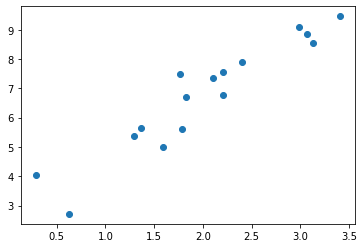

In [139]:
# 来看看产生的x-y分布
x, y = get_fake_data(batch_size=16)
plt.scatter(x.squeeze().cpu().numpy(), y.squeeze().cpu().numpy())

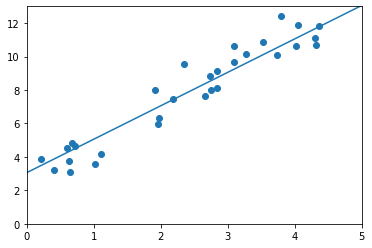

w:  2.0206243991851807 b:  2.942985773086548


In [141]:
# 随机初始化参数
w = t.rand(1, 1).to(device)
b = t.zeros(1, 1).to(device)

lr =0.02 # 学习率

for ii in range(500):
    x, y = get_fake_data(batch_size=4)
    
    # forward：计算loss
    y_pred = x.mm(w) + b.expand_as(y) # x@W等价于x.mm(w);for python3 only
    '''
    torch.mul(a, b)是矩阵a和b对应位相乘，a和b的维度必须相等，比如a的维度是(1, 2)，b的维度是(1, 2)，返回的仍是(1, 2)的矩阵
    torch.mm(a, b)是矩阵a和b矩阵相乘，比如a的维度是(1, 2)，b的维度是(2, 3)，返回的就是(1, 3)的矩阵
    '''
    loss = 0.5 * (y_pred - y) ** 2 # 均方误差
    loss = loss.mean()
    
    # backward：手动计算梯度
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    # 更新参数
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if ii%50 ==0:
       
        # 画图
        display.clear_output(wait=True)
        x = t.arange(0, 6).view(-1, 1)
        y = x.float().mm(w) + b.expand_as(x)
        plt.plot(x.cpu().numpy(), y.cpu().numpy()) # predicted
        
        x2, y2 = get_fake_data(batch_size=32) 
        plt.scatter(x2.numpy(), y2.numpy()) # true data
        
        plt.xlim(0, 5)
        plt.ylim(0, 13)
        plt.show()
        plt.pause(0.5)
        
print('w: ', w.item(), 'b: ', b.item())

可见程序已经基本学出w=2、b=3，并且图中直线和数据已经实现较好的拟合。

虽然上面提到了许多操作，但是只要掌握了这个例子基本上就可以了，其他的知识，读者日后遇到的时候，可以再看看这部份的内容或者查找对应文档。


## 3.2 autograd

用Tensor训练网络很方便，但从上一小节最后的线性回归例子来看，反向传播过程需要手动实现。这对于像线性回归等较为简单的模型来说，还可以应付，但实际使用中经常出现非常复杂的网络结构，此时如果手动实现反向传播，不仅费时费力，而且容易出错，难以检查。torch.autograd就是为方便用户使用，而专门开发的一套自动求导引擎，它能够根据输入和前向传播过程自动构建计算图，并执行反向传播。

计算图(Computation Graph)是现代深度学习框架如PyTorch和TensorFlow等的核心，其为高效自动求导算法——反向传播(Back Propogation)提供了理论支持，了解计算图在实际写程序过程中会有极大的帮助。本节将涉及一些基础的计算图知识，但并不要求读者事先对此有深入的了解。关于计算图的基础知识推荐阅读Christopher Olah的文章[^1]。

[^1]: http://colah.github.io/posts/2015-08-Backprop/


### 3.2.1 requires_grad
PyTorch在autograd模块中实现了计算图的相关功能，autograd中的核心数据结构是Variable。从v0.4版本起，Variable和Tensor合并。我们可以认为需要求导(requires_grad)的tensor即Variable. autograd记录对tensor的操作记录用来构建计算图。

Variable提供了大部分tensor支持的函数，但其不支持部分`inplace`函数，因这些函数会修改tensor自身，而在反向传播中，variable需要缓存原来的tensor来计算反向传播梯度。如果想要计算各个Variable的梯度，只需调用根节点variable的`backward`方法，autograd会自动沿着计算图反向传播，计算每一个叶子节点的梯度。

`variable.backward(gradient=None, retain_graph=None, create_graph=None)`主要有如下参数：

- grad_variables：形状与variable一致，对于`y.backward()`，grad_variables相当于链式法则${dz \over dx}={dz \over dy} \times {dy \over dx}$中的$\textbf {dz} \over \textbf {dy}$。grad_variables也可以是tensor或序列。
- retain_graph：反向传播需要缓存一些中间结果，反向传播之后，这些缓存就被清空，可通过指定这个参数不清空缓存，用来多次反向传播。
- create_graph：对反向传播过程再次构建计算图，可通过`backward of backward`实现求高阶导数。

上述描述可能比较抽象，如果没有看懂，不用着急，会在本节后半部分详细介绍，下面先看几个例子。

In [142]:
import torch as t

In [143]:
#在创建tensor的时候指定requires_grad
a = t.randn(3,4, requires_grad=True)
# 或者
a = t.randn(3,4).requires_grad_()
# 或者
a = t.randn(3,4)
a.requires_grad=True
a

tensor([[ 1.2514412403,  0.2462205738, -1.0326300859,  0.1911817789],
        [-0.2160580903,  0.1762175262,  0.5185296535,  0.7876414657],
        [-0.7803510427, -1.0841886997,  2.1908969879,  1.1424160004]],
       requires_grad=True)

In [144]:
b = t.zeros(3,4).requires_grad_()
b

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]], requires_grad=True)

In [145]:
# 也可写成c = a + b
c = a.add(b)
c

tensor([[ 1.2514412403,  0.2462205738, -1.0326300859,  0.1911817789],
        [-0.2160580903,  0.1762175262,  0.5185296535,  0.7876414657],
        [-0.7803510427, -1.0841886997,  2.1908969879,  1.1424160004]],
       grad_fn=<AddBackward0>)

In [146]:
d = c.sum()
d.backward() # 反向传播

In [147]:
d # d还是一个requires_grad=True的tensor,对它的操作需要慎重
d.requires_grad

True

In [148]:
a.grad

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [149]:
# 此处虽然没有指定c需要求导，但c依赖于a，而a需要求导，
# 因此c的requires_grad属性会自动设为True
a.requires_grad, b.requires_grad, c.requires_grad

(True, True, True)

In [150]:
# 由用户创建的variable属于叶子节点，对应的grad_fn是None
a.is_leaf, b.is_leaf, c.is_leaf

(True, True, False)

In [151]:
# c.grad是None, 因c不是叶子节点，它的梯度是用来计算a的梯度
# 所以虽然c.requires_grad = True,但其梯度计算完之后即被释放
c.grad is None

True

计算下面这个函数的导函数：
$$
y = x^2\bullet e^x
$$
它的导函数是：
$$
{dy \over dx} = 2x\bullet e^x + x^2 \bullet e^x
$$
来看看autograd的计算结果与手动求导计算结果的误差。

In [152]:
def f(x):
    '''计算y'''
    y = x**2 * t.exp(x)
    return y

def gradf(x):
    '''手动求导函数'''
    dx = 2*x*t.exp(x) + x**2*t.exp(x)
    return dx

In [153]:
x = t.randn(3,4, requires_grad = True)
y = f(x)
y

tensor([[5.2578204870e-01, 5.4110878706e-01, 3.8257021904e+00, 4.2048674822e-01],
        [5.6707000732e+01, 4.1849277914e-02, 5.4113256931e-01, 4.5228581429e+00],
        [2.3195090294e+00, 2.5981354993e-03, 2.3006124794e-01, 5.9620153904e-01]],
       grad_fn=<MulBackward0>)

In [154]:
# autograd的计算结果与利用公式手动计算的结果一致
gradf(x) 

tensor([[ 8.0440729856e-02,  1.1058032513e-02,  1.0668087959e+01,
         -3.0723500252e-01],
        [ 1.0520138550e+02, -3.2294842601e-01,  1.0485112667e-02,
          1.2193264961e+01],
        [ 7.2127270699e+00,  1.0710806400e-01, -4.5589101315e-01,
          2.6582336426e+00]], grad_fn=<AddBackward0>)

In [155]:
y.backward(t.ones(y.size())) # gradient形状与y一致
x.grad

tensor([[ 8.0440729856e-02,  1.1058032513e-02,  1.0668087959e+01,
         -3.0723500252e-01],
        [ 1.0520138550e+02, -3.2294842601e-01,  1.0485112667e-02,
          1.2193264961e+01],
        [ 7.2127270699e+00,  1.0710806400e-01, -4.5589101315e-01,
          2.6582336426e+00]])

### 3.2.2 计算图

PyTorch中`autograd`的底层采用了计算图，计算图是一种特殊的有向无环图（DAG），用于记录算子与变量之间的关系。一般用矩形表示算子，椭圆形表示变量。如表达式$ \textbf {z = wx + b}$可分解为$\textbf{y = wx}$和$\textbf{z = y + b}$，其计算图如图3-3所示，图中`MUL`，`ADD`都是算子，$\textbf{w}$，$\textbf{x}$，$\textbf{b}$即变量。

![图3-3:computation graph](imgs/com_graph.svg)

如上有向无环图中，$\textbf{X}$和$\textbf{b}$是叶子节点（leaf node），这些节点通常由用户自己创建，不依赖于其他变量。$\textbf{z}$称为根节点，是计算图的最终目标。利用链式法则很容易求得各个叶子节点的梯度。
$${\partial z \over \partial b} = 1,\space {\partial z \over \partial y} = 1\\
{\partial y \over \partial w }= x,{\partial y \over \partial x}= w\\
{\partial z \over \partial x}= {\partial z \over \partial y} {\partial y \over \partial x}=1 * w\\
{\partial z \over \partial w}= {\partial z \over \partial y} {\partial y \over \partial w}=1 * x\\
$$
而有了计算图，上述链式求导即可利用计算图的反向传播自动完成，其过程如图3-4所示。

![图3-4：计算图的反向传播](imgs/com_graph_backward.svg)


在PyTorch实现中，autograd会随着用户的操作，记录生成当前variable的所有操作，并由此建立一个有向无环图。用户每进行一个操作，相应的计算图就会发生改变。更底层的实现中，图中记录了操作`Function`，每一个变量在图中的位置可通过其`grad_fn`属性在图中的位置推测得到。在反向传播过程中，autograd沿着这个图从当前变量（根节点$\textbf{z}$）溯源，可以利用链式求导法则计算所有叶子节点的梯度。每一个前向传播操作的函数都有与之对应的反向传播函数用来计算输入的各个variable的梯度，这些函数的函数名通常以`Backward`结尾。下面结合代码学习autograd的实现细节。

In [156]:
x = t.ones(1)
b = t.rand(1, requires_grad = True)
w = t.rand(1, requires_grad = True)
y = w * x # 等价于y=w.mul(x)
z = y + b # 等价于z=y.add(b)

In [157]:
x.requires_grad, b.requires_grad, w.requires_grad

(False, True, True)

In [158]:
# 虽然未指定y.requires_grad为True，但由于y依赖于需要求导的w
# 故而y.requires_grad为True
y.requires_grad

True

In [159]:
x.is_leaf, w.is_leaf, b.is_leaf

(True, True, True)

In [160]:
y.is_leaf, z.is_leaf

(False, False)

In [161]:
# grad_fn可以查看这个variable的反向传播函数，
# z是add函数的输出，所以它的反向传播函数是AddBackward
z.grad_fn 

In [162]:
# variable的grad_fn对应着和图中的function相对应
z.grad_fn.next_functions[0][0] == y.grad_fn

True

In [163]:
# 第一个是w，叶子节点，需要求导，梯度是累加的
# 第二个是x，叶子节点，不需要求导，所以为None
y.grad_fn.next_functions

((<AccumulateGrad at 0x1fd051bdeb8>, 0), (None, 0))

In [164]:
# 叶子节点的grad_fn是None
w.grad_fn,x.grad_fn

(None, None)

计算w的梯度的时候，需要用到x的数值(${\partial y\over \partial w} = x $)，这些数值在前向过程中会保存成buffer，在计算完梯度之后会自动清空。为了能够多次反向传播需要指定`retain_graph`来保留这些buffer。

In [165]:
# 使用retain_graph来保存buffer
z.backward(retain_graph=True)
w.grad

tensor([1.])

In [166]:
# 多次反向传播，梯度累加，这也就是w中AccumulateGrad标识的含义
z.backward()
w.grad

tensor([2.])

PyTorch使用的是动态图，它的计算图在每次前向传播时都是从头开始构建，所以它能够使用Python控制语句（如for、if等）根据需求创建计算图。这点在自然语言处理领域中很有用，它意味着你不需要事先构建所有可能用到的图的路径，图在运行时才构建。

In [167]:
def abs(x):
    if x.data[0]>0: return x
    else: return -x
x = t.ones(1,requires_grad=True)
y = abs(x)
y.backward()
x.grad

tensor([1.])

In [168]:
x = -1*t.ones(1)
x = x.requires_grad_()
y = abs(x)
y.backward()
print(x.grad)

tensor([-1.])


In [169]:
y

tensor([1.], grad_fn=<NegBackward>)

In [170]:
x

tensor([-1.], requires_grad=True)

In [171]:
x.requires_grad

True

In [172]:
x.requires_grad
cc=x*3
cc.requires_grad

True

In [173]:
def f(x):
    result = 1
    for ii in x:
        if ii.item()>0: 
            result=ii*result
    return result
x = t.arange(-2,4,dtype=t.float32).requires_grad_()
y = f(x) # y = x[3]*x[4]*x[5]
y.backward()
x.grad

tensor([0., 0., 0., 6., 3., 2.])

变量的`requires_grad`属性默认为False，如果某一个节点requires_grad被设置为True，那么所有依赖它的节点`requires_grad`都是True。这其实很好理解，对于$ \textbf{x}\to \textbf{y} \to \textbf{z}$，x.requires_grad = True，当需要计算$\partial z \over \partial x$时，根据链式法则，$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y} \frac{\partial y}{\partial x}$，自然也需要求$ \frac{\partial z}{\partial y}$，所以y.requires_grad会被自动标为True. 



有些时候我们可能不希望autograd对tensor求导。认为求导需要缓存许多中间结构，增加额外的内存/显存开销，那么我们可以关闭自动求导。对于不需要反向传播的情景（如inference，即测试推理时），关闭自动求导可实现一定程度的速度提升，并节省约一半显存，因其不需要分配空间计算梯度。

In [174]:
x = t.ones(1, requires_grad=True)
w = t.rand(1, requires_grad=True)
y = x * w
# y依赖于w，而w.requires_grad = True
x.requires_grad, w.requires_grad, y.requires_grad

(True, True, True)

In [175]:
with t.no_grad():
    x = t.ones(1)
    w = t.rand(1, requires_grad = True)
    y = x * w
# y依赖于w和x，虽然w.requires_grad = True，但是y的requires_grad依旧为False
x.requires_grad, w.requires_grad, y.requires_grad

(False, True, False)

In [176]:
t.no_grad??

In [177]:
# 恢复默认配置
t.set_grad_enabled(True)

如果我们想要修改tensor的数值，但是又不希望被autograd记录，那么我么可以对tensor.data进行操作

In [178]:
a = t.ones(3,4,requires_grad=True)
b = t.ones(3,4,requires_grad=True)
c = a * b

a.data # 还是一个tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [179]:
a.data.requires_grad # 但是已经是独立于计算图之外

False

In [180]:
d = a.data.sigmoid_() # sigmoid_ 是个inplace操作，会修改a自身的值
d.requires_grad

False

In [181]:
a

tensor([[0.7310585976, 0.7310585976, 0.7310585976, 0.7310585976],
        [0.7310585976, 0.7310585976, 0.7310585976, 0.7310585976],
        [0.7310585976, 0.7310585976, 0.7310585976, 0.7310585976]],
       requires_grad=True)

如果我们希望对tensor，但是又不希望被记录, 可以使用tensor.data 或者tensor.detach()

In [182]:
a.requires_grad

True

In [183]:
# 近似于 tensor=a.data, 但是如果tensor被修改，backward可能会报错
tensor = a.detach()
tensor.requires_grad

False

In [184]:
# 统计tensor的一些指标，不希望被记录
mean = tensor.mean()
std = tensor.std()
maximum = tensor.max()

In [185]:
tensor[0]=1
# 下面会报错：　RuntimeError: one of the variables needed for gradient
#             computation has been modified by an inplace operation
#　因为 c=a*b, b的梯度取决于a，现在修改了tensor，其实也就是修改了a，梯度不再准确
# c.sum().backward() 

在反向传播过程中非叶子节点的导数计算完之后即被清空。若想查看这些变量的梯度，有两种方法：
- 使用autograd.grad函数
- 使用hook

`autograd.grad`和`hook`方法都是很强大的工具，更详细的用法参考官方api文档，这里举例说明基础的使用。推荐使用`hook`方法，但是在实际使用中应尽量避免修改grad的值。

In [187]:
x = t.ones(3, requires_grad=True)
w = t.rand(3, requires_grad=True)
y = x * w
# y依赖于w，而w.requires_grad = True
z = y.sum()
x.requires_grad, w.requires_grad, y.requires_grad

(True, True, True)

In [188]:
# 非叶子节点grad计算完之后自动清空，y.grad是None
z.backward()
(x.grad, w.grad, y.grad)

(tensor([0.8198856115, 0.2030361295, 0.8434767127]),
 tensor([1., 1., 1.]),
 None)

In [189]:
# 第一种方法：使用grad获取中间变量的梯度
x = t.ones(3, requires_grad=True)
w = t.rand(3, requires_grad=True)
y = x * w
z = y.sum()
# z对y的梯度，隐式调用backward()
t.autograd.grad(z, y)

(tensor([1., 1., 1.]),)

In [190]:
# 第二种方法：使用hook
# hook是一个函数，输入是梯度，不应该有返回值
def variable_hook(grad):
    print('y的梯度：',grad)

x = t.ones(3, requires_grad=True)
w = t.rand(3, requires_grad=True)
y = x * w
# 注册hook
hook_handle = y.register_hook(variable_hook)
z = y.sum()
z.backward()

# 除非你每次都要用hook，否则用完之后记得移除hook
hook_handle.remove()

y的梯度： tensor([1., 1., 1.])


最后再来看看variable中grad属性和backward函数`grad_variables`参数的含义，这里直接下结论：

- variable $\textbf{x}$的梯度是目标函数${f(x)} $对$\textbf{x}$的梯度，$\frac{df(x)}{dx} = (\frac {df(x)}{dx_0},\frac {df(x)}{dx_1},...,\frac {df(x)}{dx_N})$，形状和$\textbf{x}$一致。
- 对于y.backward(grad_variables)中的grad_variables相当于链式求导法则中的$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y} \frac{\partial y}{\partial x}$中的$\frac{\partial z}{\partial y}$。z是目标函数，一般是一个标量，故而$\frac{\partial z}{\partial y}$的形状与variable $\textbf{y}$的形状一致。`z.backward()`在一定程度上等价于y.backward(grad_y)。`z.backward()`省略了grad_variables参数，是因为$z$是一个标量，而$\frac{\partial z}{\partial z} = 1$

In [191]:
x = t.arange(0,3, requires_grad=True,dtype=t.float)
y = x**2 + x*2
z = y.sum()
z.backward() # 从z开始反向传播
x.grad

tensor([2., 4., 6.])

In [192]:
x = t.arange(0,3, requires_grad=True,dtype=t.float)
y = x**2 + x*2
z = y.sum()
y_gradient = t.Tensor([1,1,1]) # dz/dy
y.backward(y_gradient) #从y开始反向传播
x.grad

tensor([2., 4., 6.])

另外值得注意的是，只有对variable的操作才能使用autograd，如果对variable的data直接进行操作，将无法使用反向传播。除了对参数初始化，一般我们不会修改variable.data的值。

在PyTorch中计算图的特点可总结如下：

- autograd根据用户对variable的操作构建其计算图。对变量的操作抽象为`Function`。
- 对于那些不是任何函数(Function)的输出，由用户创建的节点称为叶子节点，叶子节点的`grad_fn`为None。叶子节点中需要求导的variable，具有`AccumulateGrad`标识，因其梯度是累加的。
- variable默认是不需要求导的，即`requires_grad`属性默认为False，如果某一个节点requires_grad被设置为True，那么所有依赖它的节点`requires_grad`都为True。
- variable的`volatile`属性默认为False，如果某一个variable的`volatile`属性被设为True，那么所有依赖它的节点`volatile`属性都为True。volatile属性为True的节点不会求导，volatile的优先级比`requires_grad`高。
- 多次反向传播时，梯度是累加的。反向传播的中间缓存会被清空，为进行多次反向传播需指定`retain_graph`=True来保存这些缓存。
- 非叶子节点的梯度计算完之后即被清空，可以使用`autograd.grad`或`hook`技术获取非叶子节点的值。
- variable的grad与data形状一致，应避免直接修改variable.data，因为对data的直接操作无法利用autograd进行反向传播
- 反向传播函数`backward`的参数`grad_variables`可以看成链式求导的中间结果，如果是标量，可以省略，默认为1
- PyTorch采用动态图设计，可以很方便地查看中间层的输出，动态的设计计算图结构。

这些知识不懂大多数情况下也不会影响对pytorch的使用，但是掌握这些知识有助于更好的理解pytorch，并有效的避开很多陷阱

### 3.2.3 扩展autograd


目前绝大多数函数都可以使用`autograd`实现反向求导，但如果需要自己写一个复杂的函数，不支持自动反向求导怎么办? 写一个`Function`，实现它的前向传播和反向传播代码，`Function`对应于计算图中的矩形， 它接收参数，计算并返回结果。下面给出一个例子。

```python

class Mul(Function):
                                                            
    @staticmethod
    def forward(ctx, w, x, b, x_requires_grad = True):
        ctx.x_requires_grad = x_requires_grad
        ctx.save_for_backward(w,x)
        output = w * x + b
        return output
        
    @staticmethod
    def backward(ctx, grad_output):
        w,x = ctx.saved_tensors
        grad_w = grad_output * x
        if ctx.x_requires_grad:
            grad_x = grad_output * w
        else:
            grad_x = None
        grad_b = grad_output * 1
        return grad_w, grad_x, grad_b, None
```

分析如下：

- 自定义的Function需要继承autograd.Function，没有构造函数`__init__`，forward和backward函数都是静态方法
- backward函数的输出和forward函数的输入一一对应，backward函数的输入和forward函数的输出一一对应
- backward函数的grad_output参数即t.autograd.backward中的`grad_variables`
- 如果某一个输入不需要求导，直接返回None，如forward中的输入参数x_requires_grad显然无法对它求导，直接返回None即可
- 反向传播可能需要利用前向传播的某些中间结果，需要进行保存，否则前向传播结束后这些对象即被释放

Function的使用利用Function.apply(variable)

In [196]:
from torch.autograd import Function
class MultiplyAdd(Function):
                                                            
    @staticmethod
    def forward(ctx, w, x, b):                              
        ctx.save_for_backward(w,x)
        output = w * x + b
        return output
        
    @staticmethod
    def backward(ctx, grad_output):                         
        w,x = ctx.saved_tensors
        grad_w = grad_output * x
        grad_x = grad_output * w
        grad_b = grad_output * 1
        return grad_w, grad_x, grad_b

In [197]:
x = t.ones(1)
w = t.rand(1, requires_grad = True)
b = t.rand(1, requires_grad = True)
# 开始前向传播
z=MultiplyAdd.apply(w, x, b)
# 开始反向传播
z.backward()

# x不需要求导，中间过程还是会计算它的导数，但随后被清空
x.grad, w.grad, b.grad

(None, tensor([1.]), tensor([1.]))

In [198]:
x = t.ones(1)
w = t.rand(1, requires_grad = True)
b = t.rand(1, requires_grad = True)
#print('开始前向传播')
z=MultiplyAdd.apply(w,x,b)
#print('开始反向传播')

# 调用MultiplyAdd.backward
# 输出grad_w, grad_x, grad_b
z.grad_fn.apply(t.ones(1))

(tensor([1.]), tensor([0.7080577612], grad_fn=<MulBackward0>), tensor([1.]))

之所以forward函数的输入是tensor，而backward函数的输入是variable，是为了实现高阶求导。backward函数的输入输出虽然是variable，但在实际使用时autograd.Function会将输入variable提取为tensor，并将计算结果的tensor封装成variable返回。在backward函数中，之所以也要对variable进行操作，是为了能够计算梯度的梯度（backward of backward）。下面举例说明，有关torch.autograd.grad的更详细使用请参照文档。

In [199]:
x = t.tensor([5], requires_grad=True,dtype=t.float)
y = x ** 2
grad_x = t.autograd.grad(y, x, create_graph=True)
grad_x # dy/dx = 2 * x

(tensor([10.], grad_fn=<MulBackward0>),)

In [200]:
grad_grad_x = t.autograd.grad(grad_x[0],x)
grad_grad_x # 二阶导数 d(2x)/dx = 2

(tensor([2.]),)

这种设计虽然能让`autograd`具有高阶求导功能，但其也限制了Tensor的使用，因autograd中反向传播的函数只能利用当前已经有的Variable操作。这个设计是在`0.2`版本新加入的，为了更好的灵活性，也为了兼容旧版本的代码，PyTorch还提供了另外一种扩展autograd的方法。PyTorch提供了一个装饰器`@once_differentiable`，能够在backward函数中自动将输入的variable提取成tensor，把计算结果的tensor自动封装成variable。有了这个特性我们就能够很方便的使用numpy/scipy中的函数，操作不再局限于variable所支持的操作。但是这种做法正如名字中所暗示的那样只能求导一次，它打断了反向传播图，不再支持高阶求导。


上面所描述的都是新式Function，还有个legacy Function，可以带有`__init__`方法，`forward`和`backwad`函数也不需要声明为`@staticmethod`，但随着版本更迭，此类Function将越来越少遇到，在此不做更多介绍。

此外在实现了自己的Function之后，还可以使用`gradcheck`函数来检测实现是否正确。`gradcheck`通过数值逼近来计算梯度，可能具有一定的误差，通过控制`eps`的大小可以控制容忍的误差。
关于这部份的内容可以参考github上开发者们的讨论[^3]。

[^3]: https://github.com/pytorch/pytorch/pull/1016

下面举例说明如何利用Function实现sigmoid Function。

In [201]:
class Sigmoid(Function):
                                                             
    @staticmethod
    def forward(ctx, x): 
        output = 1 / (1 + t.exp(-x))
        ctx.save_for_backward(output)
        return output
        
    @staticmethod
    def backward(ctx, grad_output): 
        output,  = ctx.saved_tensors
        grad_x = output * (1 - output) * grad_output
        return grad_x                            

In [202]:
# 采用数值逼近方式检验计算梯度的公式对不对
test_input = t.randn(3,4, requires_grad=True).double()
t.autograd.gradcheck(Sigmoid.apply, (test_input,), eps=1e-3)

True

In [203]:
def f_sigmoid(x):
    y = Sigmoid.apply(x)
    y.backward(t.ones(x.size()))
    
def f_naive(x):
    y =  1/(1 + t.exp(-x))
    y.backward(t.ones(x.size()))
    
def f_th(x):
    y = t.sigmoid(x)
    y.backward(t.ones(x.size()))
    
x=t.randn(100, 100, requires_grad=True)
%timeit -n 100 f_sigmoid(x)
%timeit -n 100 f_naive(x)
%timeit -n 100 f_th(x)

258 µs ± 25.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
244 µs ± 28.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
203 µs ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


显然`f_sigmoid`要比单纯利用`autograd`加减和乘方操作实现的函数快不少，因为f_sigmoid的backward优化了反向传播的过程。另外可以看出系统实现的built-in接口(t.sigmoid)更快。

### 3.2.4 小试牛刀: 用Variable实现线性回归
在上一节中讲解了利用tensor实现线性回归，在这一小节中，将讲解如何利用autograd/Variable实现线性回归，以此感受autograd的便捷之处。

In [204]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display 
import numpy as np

In [205]:
# 设置随机数种子，为了在不同人电脑上运行时下面的输出一致
t.manual_seed(1000) 

def get_fake_data(batch_size=8):
    ''' 产生随机数据：y = x*2 + 3，加上了一些噪声'''
    x = t.rand(batch_size,1) * 5
    y = x * 2 + 3 + t.randn(batch_size, 1)
    return x, y

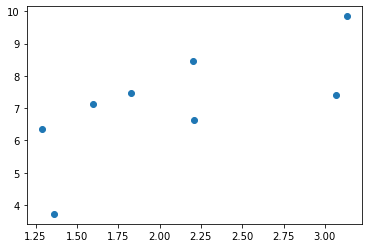

In [206]:
# 来看看产生x-y分布是什么样的
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

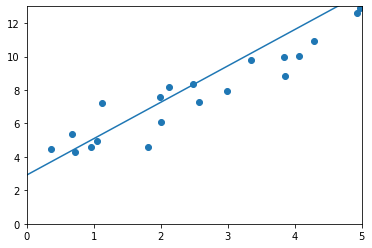

2.026895761489868 2.9732823371887207


In [207]:
# 随机初始化参数
w = t.rand(1,1, requires_grad=True)
b = t.zeros(1,1, requires_grad=True)
losses = np.zeros(500)

lr =0.005 # 学习率

for ii in range(500):
    x, y = get_fake_data(batch_size=32)
    
    # forward：计算loss
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    losses[ii] = loss.item()
    
    # backward：手动计算梯度
    loss.backward()
    
    # 更新参数
    w.data.sub_(lr * w.grad.data)
    b.data.sub_(lr * b.grad.data)
    
    # 梯度清零
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    if ii%50 ==0:
        # 画图
        display.clear_output(wait=True)
        x = t.arange(0, 6).view(-1, 1).float()
        y = x.mm(w.data) + b.data.expand_as(x)
        plt.plot(x.numpy(), y.numpy()) # predicted
        
        x2, y2 = get_fake_data(batch_size=20) 
        plt.scatter(x2.numpy(), y2.numpy()) # true data
        
        plt.xlim(0,5)
        plt.ylim(0,13)   
        plt.show()
        plt.pause(0.5)
        
print(w.item(), b.item())

(5.0, 50.0)

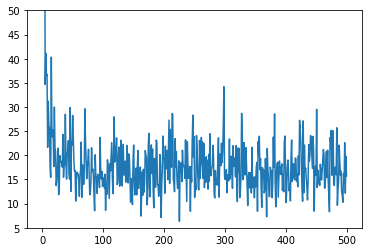

In [208]:
plt.plot(losses)
plt.ylim(5,50)

用autograd实现的线性回归最大的不同点就在于autograd不需要计算反向传播，可以自动计算微分。这点不单是在深度学习，在许多机器学习的问题中都很有用。另外需要注意的是在每次反向传播之前要记得先把梯度清零。

本章主要介绍了PyTorch中两个基础底层的数据结构：Tensor和autograd中的Variable。Tensor是一个类似Numpy数组的高效多维数值运算数据结构，有着和Numpy相类似的接口，并提供简单易用的GPU加速。Variable是autograd封装了Tensor并提供自动求导技术的，具有和Tensor几乎一样的接口。`autograd`是PyTorch的自动微分引擎，采用动态计算图技术，能够快速高效的计算导数。